In [1]:
import os, sys
from glob import glob
from os import listdir
from os.path import isfile, join

from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cwd = os.getcwd()
print(cwd)
#datapath='C:\\Users\\LeeLabFree-Windows\\Desktop\\2020\\LeeLab\\scene\\audiovisual\\exp\\analysis\\raw'
datapath = './leelab/'
#logs = [f for f in os.listdir(datapath) if os.path.isfile(os.path.join(datapath, f))]
logfiles = [y for x in os.walk(datapath) for y in glob(os.path.join(x[0], '*.log'))]
print(logfiles)
print(len(logfiles))
logs = []

for i, log in enumerate(logfiles):
    f = open(log, 'r', encoding='utf-8')
    temp = f.readlines()
    logs.append(temp)

    f.close()

#print(logs[0][0]) # sanity check

C:\Users\fhrdl\Desktop\KH
['./leelab\\s13_audiovisual_behavioral_2020_Aug_14_0153.log']
1


In [3]:
# initialize group response lists

# scene
all_stim_cor = []
all_stim_inc = []
all_stim_TP = []
all_stim_FN = []
all_stim_FP = []
all_stim_TN = []

all_stim_TP_c = []
all_stim_TP_i = []
all_stim_TP_c_a = []
all_stim_TP_c_b = []
all_stim_TP_i_a = []
all_stim_TP_i_b = []

all_stim_FN_c = []
all_stim_FN_c = []
all_stim_FN_i = []
all_stim_FN_c_a = []
all_stim_FN_c_b = []
all_stim_FN_i_a = []
all_stim_FN_i_b = []

all_stim_FP_c = []
all_stim_FP_i = []
all_stim_FP_c_a = []
all_stim_FP_c_b = []
all_stim_FP_i_a = []
all_stim_FP_i_b = []
all_stim_FP_c_correspond = []
all_stim_FP_c_notcorrespond = []
all_stim_FP_i_correspond = []
all_stim_FP_i_notcorrespond = []


all_stim_TN_c = []
all_stim_TN_c = []
all_stim_TN_i = []
all_stim_TN_c_a = []
all_stim_TN_c_b = []
all_stim_TN_i_a = []
all_stim_TN_i_b = []

all_stim_TP_a = [] #stim_TP_c_a + stim_TP_i_a
all_stim_TP_b = [] #stim_TP_c_b + stim_TP_i_b
all_stim_FN_a = [] #stim_FN_c_a + stim_FN_i_a
all_stim_FN_b = [] #stim_FN_c_b + stim_FN_i_b
all_stim_FP_a = [] #stim_FP_c_a + stim_FP_i_a
all_stim_FP_b = [] #stim_FP_c_b + stim_FP_i_b
all_stim_TN_a = [] #stim_TN_c_a + stim_TN_i_a
all_stim_TN_b = [] #stim_TN_c_b + stim_TN_i_b

all_stim_cor_a = [] #stim_TP_a + stim_TN_a
all_stim_cor_b = [] #stim_TP_b + stim_TN_b
all_stim_inc_a = [] #stim_FN_a + stim_FP_a
all_stim_inc_b = [] #stim_FN_b + stim_FN_b

all_stim_cor_c_a = []
all_stim_cor_c_b = []
all_stim_cor_i_a = []
all_stim_cor_i_b = []
all_stim_inc_c_a = []
all_stim_inc_c_b = []
all_stim_inc_i_a = []
all_stim_inc_i_b = []

all_stim_cor_c = []
all_stim_cor_i = []
all_stim_inc_c = []
all_stim_inc_i = []

# added 8/3 3:45pm
all_stim_TP_c_p = []
all_stim_TP_i_p = []
all_stim_FN_c_p = []
all_stim_FN_i_p = []
all_stim_FP_c_p = []
all_stim_FP_i_p = []
all_stim_TN_c_p = []
all_stim_TN_i_p = []

all_stim_cor_c_p = []
all_stim_cor_i_p = []
all_stim_inc_c_p = []
all_stim_inc_i_p = []


# all (alternative calculation)
#stim_cor = stim_TP_c + stim_FN_c + stim_FP_c + stim_TN_c
#stim_inc = stim_TP_i + stim_FN_i + stim_FP_i + stim_TN_i

# object
all_cor = []
all_cor_c = []
all_cor_i = []
all_cor_a = []
all_cor_b = []
all_cor_c_a = []
all_cor_c_b = []
all_cor_i_a = []
all_cor_i_b = []

all_inc = []
all_inc_c = []
all_inc_c_same = []
all_inc_c_diff = []
all_inc_c_same_a = []
all_inc_c_same_b = []
all_inc_c_diff_a = []
all_inc_c_diff_b = []
all_inc_c_a = [] #inc_c_same_a + inc_c_diff_a
all_inc_c_b = [] #inc_c_same_b + inc_c_diff_b
all_inc_i = []
all_inc_i_same = []
all_inc_i_diff = []
all_inc_i_same_a = []
all_inc_i_same_b = []
all_inc_i_diff_a = []
all_inc_i_diff_b = []
all_inc_i_a = [] #inc_i_same_a + inc_i_diff_a
all_inc_i_b = [] #inc_i_same_b + inc_i_diff_b


all_cor_a = [] #cor_c_a + cor_i_a
all_cor_b = [] #cor_c_b + cor_i_b
all_inc_a = [] #inc_c_a + inc_c_a
all_inc_b = [] #inc_c_b + inc_c_b

#added 8/3 4:20pm
all_cor_c_p = []
all_cor_i_p = []
all_inc_c_p = []
all_inc_i_p = []

In [4]:
for subject, log in enumerate(logfiles):
    #if subject == 0:
    #    continue
    if subject == 6:
        continue
    if subject == 7:
        continue
    ## test extraction from individual log
    fulllog = logs[subject]
    enc_stim = []
    enc_audio = []
    ret_stim_scene = []
    ret_stim_object = []
    ret_gt_scene = [] #y, n
    ret_gt_object = [] #a, b, c, d
    ret_gt = []
    ret_congruency = []
    ret_category = []
    ret_audio = []
    resp_rating = []
    resp_key = []
    startKey = False

    #n_train = 24    
    n_enc = 12
    #n_serial = 12
    n_ret = 24

    for i, line in enumerate(fulllog):
        if 'New trial' in line: 
            if ('i.wav' in line) or ('c.wav' in line) or ('beep.wav' in line): #encoding stim
                #print(line)
                temp = line.split(')')
                imagefile = (temp[1].split())[-1].replace("'","")
                audiofile = (temp[2].split())[-1].replace("'","")
                image = (imagefile.split('/'))[-1]
                audio = (audiofile.split('/'))[-1]

                enc_stim.append(image)

                if audio.split('.')[-2] == 'beep':
                    enc_audio.append('a')
                else:
                    enc_audio.append('b')


            if 'g.png' in line: #retrieval stim
                temp = line.split(')')
                for idx, word in enumerate(temp):
                    if '_g.png' in word:
                        ret_scene = ((temp[idx]).split(','))[-1].replace("'","")
                        ret_o1 = ((temp[idx+2]).split(','))[-1].replace("'","")
                        ret_o2 = ((temp[idx+2+1]).split(','))[-1].replace("'","")
                        ret_o3 = ((temp[idx+2+2]).split(','))[-1].replace("'","")
                        ret_o4 = ((temp[idx+2+3]).split(','))[-1].replace("'","")

                        ret_scene = ret_scene.split('/')[-1]
                        ret_object = [ret_o1.split('/')[-1], \
                                      ret_o2.split('/')[-1], \
                                      ret_o3.split('/')[-1], \
                                      ret_o4.split('/')[-1]
                                     ]

                        #print(ret_scene)
                        #print(ret_object)
                        #print(ret_o1)
                        #print(ret_o2)
                        #print(ret_o3)
                        #print(ret_o4)

                        ret_stim_scene.append(ret_scene)
                        ret_stim_object.append(ret_object)

        if 'rating=' in line:
    #        print(line)
            s = line.split()
            s_ = s[-1].split(',')
            s__ = s_[-1].split('=')
    #         print(s[-1])
            resp_rating.append(s__[-1])
        if 'Keypress' in line:
            s = line.split()
            s_ = s[-1].split(',')
    #        print(s[-1])
            if s_[0] == 'y' or s_[0] == 'n':
                startKey = True;
            if startKey:
                resp_key.append(s_[0])

    #Rating line format: ['293.9828', 'DATA', 'RatingScale', 'familarityrating:', '(mouse', 'response)', 'rating=3']
    #Keypress format: ['17.7455', 'DATA', 'Keypress:', 'space']

    #355.5340 	EXP 	New trial (rep=0, index=0): \
    #    OrderedDict([('stim', 'background/u_004_bathroom/bathroom_02_i_2.png'),\
    #                 ('audio', 'sound/bathroom/bathroom_i.wav')])

    #590.6219 	EXP 	New trial (rep=0, index=0): \
    #    OrderedDict([('candidatestim1', 'background/u_003_backyard/backyard_01_g.png'), \ #0
    #                 ('corrAns', 'y'), \ #1
    #                 ('candidatestim2_a', 'object360/grasscutter_1.png'), \ #2
    #                 ('candidatestim2_b', 'object360/grasscutter_2.png'), \ #3
    #                 ('candidatestim2_c', 'object360/printer_1.png'), \ #4
    #                 ('candidatestim2_d', 'object360/printer_2.png'), \ #5
    #                 ('corrAns2', 'a')]) #5

    ################################################################################################
    ## obsolete
    #train_con = conditions[1:1+n_train]
    #enc_con = conditions[1+n_train+1:1+n_train+1+n_enc]
    #serial_con = conditions[1+n_train+1+n_enc+1:1+n_train+1+n_enc+1+n_serial]
    #retrieve_con = conditions[1+n_train+1+n_enc+1+n_serial+1:1+n_train+1+n_enc+1+n_serial+1+n_ret]

    ################################################################################################
    # manual correction of resp_key
    if subject == 0: #s13
      resp_key = ['n', 'space', 'y', 'b', 'y', 'c', 'y', 'c', 'y', 'a', 'y', 'a', 'y', 'b', 'n', 'space', 'n', 'space', 'y', 'a', 'n', 'space', 'n', 'space', 'n', 'space', 'n', 'space', 'y', 'd', 'n', 'space', 'n', 'space', 'n', 'space', 'n', 'space', 'n', 'space', 'y', 'a', 'y', 'c', 'n', 'space', 'y', 'b']
    
    print(resp_key)
    print(len(resp_key))

    # compute gt from ret and enc
    # ---- for multiple list enumeration: for index, (enc, ret) in enumerate(zip(enc_stim, ret_stim)):

    pairs_c = {
        "construction": "circularsaw",
        "battlefield": "gun",
        "street": "motorcycle",
        "bathroom": "toilet",
        "kitchen": "microwave",
        "office": "printer",
        "beach": "seagull",
        "cave": "bat",
        "underwater": "dolphin",
        "farm": "cow",
        "nightforest": "wolf",
        "savanna": "lion"
    }

    pairs_i = {
        "construction": "printer",
        "battlefield": "microwave",
        "street": "toilet",
        "bathroom": "motorcycle",
        "kitchen": "gun",
        "office": "circularsaw",
        "beach": "bat",
        "cave": "seagull",
        "underwater": "cow",
        "farm": "dolphin",
        "nightforest": "lion",
        "savanna": "wolf"
    }

    for i, (ret_scene, ret_object) in enumerate(zip(ret_stim_scene, ret_stim_object)):
        ret_scene_category = ret_scene.split('_')[0]
        ret_scene_number = ret_scene.split('_')[1]
        for j, enc in enumerate(enc_stim):
            enc_scene = enc.split()[0]
            enc_scene_category = enc_scene.split('_')[0]
            enc_scene_number = enc_scene.split('_')[1]
            enc_scene_congruency = enc_scene.split('_')[2]
            enc_obj_number = enc_scene.split('_')[3]
            if ret_scene_category == enc_scene_category:
                ret_category.append(ret_scene_category) # sync ret category
                ret_congruency.append(enc_scene_congruency) # sync ret congruency
                if enc_scene_number == ret_scene_number:
                    ret_gt_scene.append('y')
                    ret_gt.append('y')
                    if enc_scene_congruency == 'c':
                        enc_obj_category = pairs_c[enc_scene_category]
                        for letter, item in enumerate(ret_object):
                            if (item.split('_')[0] == enc_obj_category) and \
                            (item.split('_')[1] == enc_obj_number):
                                if letter == 0:
                                    ret_gt_object.append('a')
                                    ret_gt.append('a')
                                elif letter == 1:
                                    ret_gt_object.append('b')
                                    ret_gt.append('b')
                                elif letter == 2:
                                    ret_gt_object.append('c')
                                    ret_gt.append('c')
                                elif letter == 3:
                                    ret_gt_object.append('d')
                                    ret_gt.append('d')
                    elif enc_scene_congruency == 'i':
                        enc_obj_category = pairs_i[enc_scene_category]
                        for letter, item in enumerate(ret_object):
                            if (item.split('_')[0] == enc_obj_category) and (item.split('_')[1] == enc_obj_number):
                                if letter == 0:
                                    ret_gt_object.append('a')
                                    ret_gt.append('a')
                                elif letter == 1:
                                    ret_gt_object.append('b')
                                    ret_gt.append('b')
                                elif letter == 2:
                                    ret_gt_object.append('c')
                                    ret_gt.append('c')
                                elif letter == 3:
                                    ret_gt_object.append('d')
                                    ret_gt.append('d')
                else:
                    ret_gt_scene.append('n')
                    ret_gt_object.append('space')
                    ret_gt.append('n')
                    ret_gt.append('space')


    for i, ret_scene in enumerate(ret_stim_scene):
        ret_scene_category = ret_scene.split('_')[0]
        ret_scene_number = ret_scene.split('_')[1]
        for j, enc in enumerate(enc_stim):
            enc_scene = enc.split()[0]
            enc_scene_category = enc_scene.split('_')[0]
            if ret_scene_category == enc_scene_category:
                ret_audio.append(enc_audio[j]) # sync audio
                #print(j, enc_audio[j])

    #print(ret_gt_scene)
    #print(ret_gt_object)
    #print(ret_congruency)
    #print(ret_category)
    #print(subject, ret_audio)
    #print(len(ret_gt))
    #print(len(ret_congruency))
    #print(len(ret_category))
    #print(len(ret_audio))

    #print(ret_gt)
    #print(len(ret_gt))
    #
    #print(resp_key)
    #print(len(resp_key))
    #
    #print("enc_stim", enc_stim)
    #print("enc_audio", enc_audio)
    #print("ret_stim", ret_stim_scene)
    #print("ret_stim_object", ret_stim_object)
    #print("rect_gt_scene", ret_gt_scene)
    #print("ret_gt_object", ret_gt_object)
    #print("ret_gt", ret_gt)
    #print("ret_congruency", ret_congruency)
    #print("ret_category", ret_category)
    #print("ret_audio", ret_audio)

    ################################################################################################

    #print("Train stimuli")
    #for i, t in enumerate(train_con):
    #    print('%s' %(t))
    #    #print('%d %s' %(i+1, t))
    #print("\n")
    #
    #print("Encoding stimuli")
    #for i, t in enumerate(enc_con):
    #    print('%s' %(t))
    #    #print('%d %s' %(i+1, t))
    #print("\n")
    #
    #print("Serial sevens stimuli")
    #for i, t in enumerate(serial_con):
    #    print('%s' %(t))
    #    #print('%d %s' %(i+1, t))
    #print("\n")
    #
    #print("Retrieve stimuli")
    #for i, t in enumerate(retrieve_con):
    #    print('%s' %(t))
    #print("\n")


    #print("Conditions")
    # for i, condition in enumerate(conditions):

    #     print('#%d: %s' %(i+1, condition)) # sanity check
    # print("\n")

#     print("Rating response")
#     for i, rate in enumerate(resp_rating):
#         print('%s' %(rate)) 
#         #print('%d: %s' %(i+1, rate)) 
#     print("\n")


    ###################################################
    ## Initialize individiual response variables

    # scene

    stim_TP = 0.0
    stim_FN = 0.0
    stim_FP = 0.0
    stim_TN = 0.0

    stim_TP_c = 0.0
    stim_TP_i = 0.0
    stim_TP_c_a = 0.0
    stim_TP_c_b = 0.0
    stim_TP_i_a = 0.0
    stim_TP_i_b = 0.0

    stim_FN_c = 0.0
    stim_FN_c = 0.0
    stim_FN_i = 0.0
    stim_FN_c_a = 0.0
    stim_FN_c_b = 0.0
    stim_FN_i_a = 0.0
    stim_FN_i_b = 0.0

    stim_FP_c = 0.0
    stim_FP_i = 0.0
    stim_FP_c_a = 0.0
    stim_FP_c_b = 0.0
    stim_FP_i_a = 0.0
    stim_FP_i_b = 0.0
    stim_FP_c_correspond = 0.0
    stim_FP_c_notcorrespond = 0.0
    stim_FP_i_correspond = 0.0
    stim_FP_i_notcorrespond = 0.0


    stim_TN_c = 0.0
    stim_TN_c = 0.0
    stim_TN_i = 0.0
    stim_TN_c_a = 0.0
    stim_TN_c_b = 0.0
    stim_TN_i_a = 0.0
    stim_TN_i_b = 0.0

    # all (alternative calculation)
    #stim_cor = stim_TP_c + stim_FN_c + stim_FP_c + stim_TN_c
    #stim_inc = stim_TP_i + stim_FN_i + stim_FP_i + stim_TN_i

    # object
    cor = 0.0
    cor_c = 0.0
    cor_i = 0.0
    cor_a = 0.0
    cor_b = 0.0
    cor_c_a = 0.0
    cor_c_b = 0.0
    cor_i_a = 0.0
    cor_i_b = 0.0

    inc = 0.0
    inc_c = 0.0
    inc_i = 0.0
    inc_c_a = 0.0
    inc_c_b = 0.0
    inc_i_a = 0.0
    inc_i_b = 0.0

    # TO DO
    inc_c_same = 0.0
    inc_c_diff = 0.0
    inc_c_same_a = 0.0
    inc_c_same_b = 0.0
    inc_c_diff_a = 0.0
    inc_c_diff_b = 0.0
    inc_i_same = 0.0
    inc_i_diff = 0.0
    inc_i_same_a = 0.0
    inc_i_same_b = 0.0
    inc_i_diff_a = 0.0
    inc_i_diff_b = 0.0


    # calculate accuracy
    stim_cor = 0.0
    stim_inc = 0.0
    nStim = 24.0
    nEncStim = 12.0
    nC = 5.0
    nI = 7.0

    for i, (resp, gt) in enumerate(zip(resp_key, ret_gt)): # list size == nStim * 2
        if i % 2 == 0: #scene response
            j = int(i/2) # j == nStim
        #print('%d: %s' %(i+1, key)) 
            if resp == gt: #cor
                stim_cor = stim_cor + 1
                if resp == 'y' and gt == 'y': #TP
                    stim_TP = stim_TP + 1
                    if ret_congruency[j] == 'c': # ret congruency - consistent
                        stim_TP_c = stim_TP_c + 1
                        if ret_audio[j] == 'a': # TP_c_a
                            stim_TP_c_a = stim_TP_c_a + 1
                        elif ret_audio[j] == 'b': # TP_c_b
                            stim_TP_c_b = stim_TP_c_b + 1
                    elif ret_congruency[j] == 'i': # ret congruency - inconsistent
                        stim_TP_i = stim_TP_i + 1
                        if ret_audio[j] == 'a': # TP_i_a
                            stim_TP_i_a = stim_TP_i_a + 1
                        elif ret_audio[j] == 'b': # TP_i_b
                            stim_TP_i_b = stim_TP_i_b + 1                    
                elif resp == 'n' and gt == 'n': #TN
                    stim_TN = stim_TN + 1
                    if ret_congruency[j] == 'c': # ret congruency - consistent
                        stim_TN_c = stim_TN_c + 1
                        if ret_audio[j] == 'a': # TN_c_a
                            stim_TN_c_a = stim_TN_c_a + 1
                        elif ret_audio[j] == 'b': # TN_c_b
                            stim_TN_c_b = stim_TN_c_b + 1
                    elif ret_congruency[j] == 'i': # ret congruency - inconsistent
                        stim_TN_i = stim_TN_i + 1
                        if ret_audio[j] == 'a': # TN_i_a
                            stim_TN_i_a = stim_TN_i_a + 1
                        elif ret_audio[j] == 'b': # TN_i_b
                            stim_TN_i_b = stim_TN_i_b + 1
            elif resp != gt: # inc
                stim_inc = stim_inc + 1
                if resp == 'y' and gt == 'n': #FP
                    stim_FP = stim_FP + 1
                    if ret_congruency[j] == 'c': # ret congruency - consistent
                        stim_FP_c = stim_FP_c + 1
                        # TODO: FP error corresponding to enc congruency
                        if ret_audio[j] == 'a': # FP_c_a
                            stim_FP_c_a = stim_FP_c_a + 1
                        elif ret_audio[j] == 'b': # FP_c_b
                            stim_FP_c_b = stim_FP_c_b + 1
                    elif ret_congruency[j] == 'i': # ret congruency - inconsistent
                        stim_FP_i = stim_FP_i + 1
                        if ret_audio[j] == 'a': # FP_i_a
                            stim_FP_i_a = stim_FP_i_a + 1
                        elif ret_audio[j] == 'b': # FP_i_b
                            stim_FP_i_b = stim_FP_i_b + 1
                elif resp == 'n' and gt == 'y': #FN
                    stim_FN = stim_FN + 1
                    if ret_congruency[j] == 'c': # ret congruency - consistent
                        stim_FN_c = stim_FN_c + 1
                        if ret_audio[j] == 'a': # FN_c_a
                            stim_FN_c_a = stim_FN_c_a + 1
                        elif ret_audio[j] == 'b': # FN_c_b
                            stim_FN_c_b = stim_FN_c_b + 1
                    elif ret_congruency[j] == 'i': # ret congruency - inconsistent
                        stim_FN_i = stim_FN_i + 1
                        if ret_audio[j] == 'a': # FN_i_a
                            stim_FN_i_a = stim_FN_i_a + 1
                        elif ret_audio[j] == 'b': # FN_i_b
                            stim_FN_i_b = stim_FN_i_b + 1
        elif i % 2 != 0: #object response
            j = int(i/2) # j == nStim
            if gt == 'space': # added 8/3 2:00pm (removes scene TN from object counts)
                continue
            if resp == gt: # correct
                print('cor %d ' %(j))
                cor = cor + 1
                if ret_congruency[j] == 'c':# correct consistent
                    cor_c = cor_c + 1
                    if ret_audio[j] == 'a':
                        cor_c_a = cor_c_a + 1
                    elif ret_audio[j] == 'b':
                        cor_c_b = cor_c_b + 1
                elif ret_congruency[j] == 'i': # correct inconsistent
                    cor_i = cor_i + 1
                    if ret_audio[j] == 'a':
                        cor_i_a = cor_i_a + 1
                    elif ret_audio[j] == 'b':
                        cor_i_b = cor_i_b + 1
            elif resp != gt: #incorrect 
                print('inc %d ' %(j))
                inc = inc + 1
                if ret_congruency[j] == 'c':# incorrect consistent
                    inc_c = inc_c + 1
                    if ret_audio[j] == 'a':
                        inc_c_a = inc_c_a + 1
                    elif ret_audio[j] == 'b':
                        inc_c_b = inc_c_b + 1
                elif ret_congruency[j] == 'i': # incorrect inconsistent
                    inc_i = inc_i + 1
                    if ret_audio[j] == 'a':
                        inc_i_a = inc_i_a + 1
                    elif ret_audio[j] == 'b':
                        inc_i_b = inc_i_b + 1

    print("stim_cor  stim_inc")
    print(stim_cor, stim_inc)
    # print(stim_con)
    # print(stim_inc)
    # print(cor)
    # print(inc)
    all_stim_cor.append(stim_cor)
    all_stim_inc.append(stim_inc)
    
    #print("stim_cor_c stim_cor_i")
    #print(stim_cor_c, stim_cor_i)

    print("stim_TP  stim_FN  stim_FP  stim_TN")
    print(stim_TP, stim_FN, stim_FP, stim_TN)
    # print(stim_TP)
    # print(stim_FN)
    # print(stim_FP)
    # print(stim_TN)
    all_stim_TP.append(stim_TP)
    all_stim_FN.append(stim_FN)
    all_stim_FP.append(stim_FP)
    all_stim_TN.append(stim_TN)

    print("stim_TP_c stim_TP_i stim_FN_c stim_FN_i stim_FP_i stim_FP_i stim_TN_c stim_TN_i")
    print(stim_TP_c, stim_TP_i, stim_FN_c, stim_FN_i, stim_FP_c, stim_FP_i, stim_TN_c, stim_TN_i)
    # print(stim_TP_c)
    # print(stim_TP_i)
    # print(stim_FN_c)
    # print(stim_FN_i)
    # print(stim_FP_c)
    # print(stim_FP_i)
    # print(stim_TN_c)
    # print(stim_TN_i)
    all_stim_TP_c.append(stim_TP_c)
    all_stim_TP_i.append(stim_TP_i)
    all_stim_FN_c.append(stim_FN_c)
    all_stim_FN_i.append(stim_FN_i)
    all_stim_FP_c.append(stim_FP_c)
    all_stim_FP_i.append(stim_FP_i)
    all_stim_TN_c.append(stim_TN_c)
    all_stim_TN_i.append(stim_TN_i)

    # added 8/3 3:45pm
    all_stim_TP_c_p.append(stim_TP_c/nC)
    all_stim_TP_i_p.append(stim_TP_i/nI)
    all_stim_FN_c_p.append(stim_FN_c/nC)
    all_stim_FN_i_p.append(stim_FN_i/nI)
    all_stim_FP_c_p.append(stim_FP_c/nC)
    all_stim_FP_i_p.append(stim_FP_i/nI)
    all_stim_TN_c_p.append(stim_TN_c/nC)
    all_stim_TN_i_p.append(stim_TN_i/nI)


    print("stim TP_c_a TP_c_b TP_i_a TP_i_b FN_c_a FN_c_b FN_i_a FN_i_b")
    print(stim_TP_c_a, stim_TP_c_b, stim_TP_i_a, stim_TP_i_b, stim_FN_c_a, stim_FN_c_b, stim_FN_i_a, stim_FN_i_b)
    all_stim_TP_c_a.append(stim_TP_c_a)
    all_stim_TP_c_b.append(stim_TP_c_b)
    all_stim_TP_i_a.append(stim_TP_i_a)
    all_stim_TP_i_b.append(stim_TP_i_b)
    all_stim_FN_c_a.append(stim_FN_c_a)
    all_stim_FN_c_b.append(stim_FN_c_b)
    all_stim_FN_i_a.append(stim_FN_i_a)
    all_stim_FN_i_b.append(stim_FN_i_b)

    print("stim FP_c_a FP_c_b FP_i_a FP_i_b TN_c_a TN_c_b TN_i_a TN_i_b")
    print(stim_FP_c_a, stim_FP_c_b, stim_FP_i_a, stim_FP_i_b, stim_TN_c_a, stim_TN_c_b, stim_TN_i_a, stim_TN_i_b)
    all_stim_FP_c_a.append(stim_FP_c_a)
    all_stim_FP_c_b.append(stim_FP_c_b)
    all_stim_FP_i_a.append(stim_FP_i_a)
    all_stim_FP_i_b.append(stim_FP_i_b)
    all_stim_TN_c_a.append(stim_TN_c_a)
    all_stim_TN_c_b.append(stim_TN_c_b)
    all_stim_TN_i_a.append(stim_TN_i_a)
    all_stim_TN_i_b.append(stim_TN_i_b)

    stim_cor_c_a = stim_TP_c_a + stim_TN_c_a
    stim_cor_c_b = stim_TP_c_b + stim_TN_c_b
    stim_cor_i_a = stim_TP_i_a + stim_TN_i_a
    stim_cor_i_b = stim_TP_i_b + stim_TN_i_b
    stim_inc_c_a = stim_FP_c_a + stim_FN_c_a
    stim_inc_c_b = stim_FP_c_b + stim_FN_c_b
    stim_inc_i_a = stim_FP_i_a + stim_FN_i_a
    stim_inc_i_b = stim_FP_i_b + stim_FN_i_b
    
    stim_cor_c = stim_cor_c_a + stim_cor_c_b
    stim_cor_i = stim_cor_i_a + stim_cor_i_b
    stim_inc_c = stim_inc_c_a + stim_inc_c_b
    stim_inc_i = stim_inc_i_a + stim_inc_i_b
    
    all_stim_cor_c_a.append(stim_cor_c_a)
    all_stim_cor_c_b.append(stim_cor_c_b)
    all_stim_cor_i_a.append(stim_cor_i_a)
    all_stim_cor_i_b.append(stim_cor_i_b)
    all_stim_inc_c_a.append(stim_inc_c_a)
    all_stim_inc_c_b.append(stim_inc_c_b)
    all_stim_inc_i_a.append(stim_inc_i_a)
    all_stim_inc_i_b.append(stim_inc_i_b)
    
    all_stim_cor_c.append(stim_cor_c)
    all_stim_cor_i.append(stim_cor_i)
    all_stim_inc_c.append(stim_inc_c)
    all_stim_inc_i.append(stim_inc_i)

    # added 8/3 3:45 pm
    all_stim_cor_c_p.append(stim_cor_c / (nC*2))
    all_stim_cor_i_p.append(stim_cor_i / (nI*2))
    all_stim_inc_c_p.append(stim_inc_c / (nC*2))
    all_stim_inc_i_p.append(stim_inc_i / (nI*2))
    
    
    stim_TP_a = stim_TP_c_a + stim_TP_i_a 
    stim_TP_b = stim_TP_c_b + stim_TP_i_b
    stim_FN_a = stim_FN_c_a + stim_FN_i_a
    stim_FN_b = stim_FN_c_b + stim_FN_i_b
    stim_FP_a = stim_FP_c_a + stim_FP_i_a
    stim_FP_b = stim_FP_c_b + stim_FP_i_b
    stim_TN_a = stim_TN_c_a + stim_TN_i_a
    stim_TN_b = stim_TN_c_b + stim_TN_i_b
    all_stim_TP_a.append(stim_TP_a)
    all_stim_TP_b.append(stim_TP_b)
    all_stim_FN_a.append(stim_FN_a)
    all_stim_FN_b.append(stim_FN_b)
    all_stim_FP_a.append(stim_FP_a)
    all_stim_FP_b.append(stim_FP_b)
    all_stim_TN_a.append(stim_TN_a)
    all_stim_TN_b.append(stim_TN_b)

    stim_cor_a = stim_TP_a + stim_TN_a #added 8/1 10:00am
    stim_cor_b = stim_TP_b + stim_TN_b
    stim_inc_a = stim_FN_a + stim_FP_a
    stim_inc_b = stim_FN_b + stim_FP_b # ERROR (stim_FN_b + stim_FN_b) modified 8/3 2:00pm
    all_stim_cor_a.append(stim_cor_a)
    all_stim_cor_b.append(stim_cor_b)
    all_stim_inc_a.append(stim_inc_a)
    all_stim_inc_b.append(stim_inc_b)
    #inc_c_a = inc_c_same_a + inc_c_diff_a
    #inc_c_b = inc_c_same_b + inc_c_diff_b
    #inc_i_a = inc_i_same_a + inc_i_diff_a
    #inc_i_b = inc_i_same_b + inc_i_diff_b

    cor_a = cor_c_a + cor_i_a
    cor_b = cor_c_b + cor_i_b
    inc_a = inc_c_a + inc_i_a
    inc_b = inc_c_b + inc_i_b


    print("stim_cor_a stim_cor_b stim_inc_a stim_inc_b")
    print(stim_cor_a, stim_cor_b, stim_inc_a, stim_inc_b)
    all_stim_cor_a.append(stim_cor_a)
    all_stim_cor_b.append(stim_cor_b)
    all_stim_inc_a.append(stim_inc_a)
    all_stim_inc_b.append(stim_inc_b)

    print("\n")# scene percentage

    print("stim_cor stim_inc cor inc")
    print([var / nStim for var in [stim_cor, stim_inc, cor, inc]])
    # print(stim_cor/nStim)
    # print(stim_inc/nStim)
    # print(cor/nStim)
    # print(inc/nStim)

    print("stim_TP stim_FN stim_FP stim_TN")
    print([var / nEncStim for var in [stim_TP, stim_FN, stim_FP, stim_TN]])
    # print(stim_TP/nEncStim)
    # print(stim_FN/nEncStim)
    # print(stim_FP/nEncStim)
    # print(stim_TN/nEncStim)

    print("stim_TP_c stim_TP_i stim_FN_c stm_FN_i stim_FP_c stim_FP_i")

    ## object
    print("cor inc")
    print(cor, inc)
    all_cor.append(cor)
    all_inc.append(inc)

    print("cor_c cor_i inc_c inc_i")
    print(cor_c, cor_i, inc_c, inc_i)
    all_cor_c.append(cor_c)
    all_cor_i.append(cor_i)
    all_inc_c.append(inc_c)
    all_inc_i.append(inc_i)

    # added 8/3 4:20pm 
    all_cor_c_p.append(cor_c/(cor_c+inc_c))
    all_cor_i_p.append(cor_i/(cor_i+inc_i))
    all_inc_c_p.append(inc_c/(cor_c+inc_c))
    all_inc_i_p.append(inc_i/(cor_i+inc_i))    
    print("cor_c_p cor_i_p inc_c_p inc_i_p")
    print(all_cor_c_p)
    print(all_cor_i_p)
    print(all_inc_c_p)
    print(all_inc_i_p)
    
    print("cor_a cor_b inc_a inc_b")
    print(cor_a, cor_b, inc_a, inc_b)
    all_cor_a.append(cor_a)
    all_cor_b.append(cor_b)
    all_inc_a.append(inc_a)
    all_inc_b.append(inc_b)

    print("cor_c_a c_b i_a i_b inc_c_a c_b i_a i_b")
    print(cor_c_a, cor_c_b, cor_i_a, cor_i_b, inc_c_a, inc_c_b, inc_i_a, inc_i_b)
    all_cor_c_a.append(cor_c_a)
    all_cor_c_b.append(cor_c_b)
    all_cor_i_a.append(cor_i_a)
    all_cor_i_b.append(cor_i_b)
    all_inc_c_a.append(inc_c_a)
    all_inc_c_b.append(inc_c_b)
    all_inc_i_a.append(inc_i_a)
    all_inc_i_b.append(inc_i_b)


['n', 'space', 'y', 'b', 'y', 'c', 'y', 'c', 'y', 'a', 'y', 'a', 'y', 'b', 'n', 'space', 'n', 'space', 'y', 'a', 'n', 'space', 'n', 'space', 'n', 'space', 'n', 'space', 'y', 'd', 'n', 'space', 'n', 'space', 'n', 'space', 'n', 'space', 'n', 'space', 'y', 'a', 'y', 'c', 'n', 'space', 'y', 'b']
48
cor 2 
cor 5 
cor 6 
inc 9 
inc 13 
cor 14 
inc 16 
inc 17 
inc 20 
cor 21 
inc 22 
inc 23 
stim_cor  stim_inc
17.0 7.0
stim_TP  stim_FN  stim_FP  stim_TN
8.0 4.0 3.0 9.0
stim_TP_c stim_TP_i stim_FN_c stim_FN_i stim_FP_i stim_FP_i stim_TN_c stim_TN_i
3.0 5.0 2.0 2.0 2.0 1.0 3.0 6.0
stim TP_c_a TP_c_b TP_i_a TP_i_b FN_c_a FN_c_b FN_i_a FN_i_b
2.0 1.0 3.0 2.0 0.0 2.0 1.0 1.0
stim FP_c_a FP_c_b FP_i_a FP_i_b TN_c_a TN_c_b TN_i_a TN_i_b
1.0 1.0 1.0 0.0 1.0 2.0 3.0 3.0
stim_cor_a stim_cor_b stim_inc_a stim_inc_b
9.0 8.0 3.0 4.0


stim_cor stim_inc cor inc
[0.7083333333333334, 0.2916666666666667, 0.20833333333333334, 0.2916666666666667]
stim_TP stim_FN stim_FP stim_TN
[0.6666666666666666, 0.3333333333

In [5]:
# consistent vs. inconsistent
#print(all_stim_cor_c)
#print(all_stim_cor_i)
#[t, p] = stats.ttest_ind(all_stim_c, all_stim_i)
#print("Scene/consistent vs. inconsistent: %f %f" %(t, p))
print("Scene/correct (average):", np.mean(all_stim_cor), np.mean(all_stim_cor)/nStim*100)
print("Scene/TP (average):", np.mean(all_stim_TP), np.mean(all_stim_TP)/nEncStim*100)
print("Scene/FP (average):", np.mean(all_stim_FP), np.mean(all_stim_FP)/nEncStim*100)
print("Scene/TN (average):", np.mean(all_stim_TN), np.mean(all_stim_TN)/nEncStim*100)
print("Scene/FN (average):", np.mean(all_stim_FN), np.mean(all_stim_FN)/nEncStim*100)
print("Object/correct (average): ", np.mean(all_cor))

print("Scene/correct/a: ", all_stim_cor_a)
print("Scene/correct/b: ", all_stim_cor_b)
print("Scene/incorrect/a: ", all_stim_inc_a)
print("Scene/incorrect/b: ", all_stim_inc_b)
print("\n")

print("Object/incorrect: ", all_inc)



Scene/correct (average): 17.0 70.83333333333334
Scene/TP (average): 8.0 66.66666666666666
Scene/FP (average): 3.0 25.0
Scene/TN (average): 9.0 75.0
Scene/FN (average): 4.0 33.33333333333333
Object/correct (average):  5.0
Scene/correct/a:  [9.0, 9.0]
Scene/correct/b:  [8.0, 8.0]
Scene/incorrect/a:  [3.0, 3.0]
Scene/incorrect/b:  [4.0, 4.0]


Object/incorrect:  [7.0]


In [9]:
print("\n######################### t-tests \n")

# all_stim_cor_c_p.append(stim_cor_c / (nC*2))
# all_stim_cor_i_p.append(stim_cor_i / (nI*2))
# all_stim_inc_c_p.append(stim_inc_c / (nC*2))
# all_stim_inc_i_p.append(stim_inc_i / (nI*2))
    
# all_stim_TP_c_p = []
# all_stim_TP_i_p = []
# all_stim_FN_c_p = []
# all_stim_FN_i_p = []
# all_stim_FP_c_p = []
# all_stim_FP_i_p = []
# all_stim_TN_c_p = []
# all_stim_TN_i_p = []

# Scene

[t, p] = stats.ttest_ind(all_stim_cor_a, all_stim_cor_b)
[t2, p2] = stats.ttest_ind(all_stim_inc_a, all_stim_inc_b)
print("Scene/correct/a vs. b %.3f %.3f" %(t, p))
print("Scene/incorrect/a vs. b %.3f %.3f" %(t2, p2))
print("\n")

[t, p] = stats.ttest_ind(all_stim_cor_c_p, all_stim_cor_i_p)
[t2, p2] = stats.ttest_ind(all_stim_inc_c_p, all_stim_inc_i_p)
print("Scene/correct/c vs. i: %.3f %.3f" %(t, p))
print("Scene/incorrect/c vs. i: %.3f %.3f" %(t2, p2))
print("\n")

[t, p] = stats.ttest_ind(all_stim_cor_c_a, all_stim_cor_c_b)
[t2, p2] = stats.ttest_ind(all_stim_cor_i_a, all_stim_cor_i_b)
print("Scene/correct/c/a vs. b: %.3f %.3f" %(t, p))
print("Scene/correct/i/a vs. b: %.3f %.3f" %(t2, p2))
print("\n")

[t, p] = stats.ttest_ind(all_stim_inc_c_a, all_stim_inc_c_b)
[t2, p2] = stats.ttest_ind(all_stim_inc_i_a, all_stim_inc_i_b)
print("Scene/incorrect/c/a vs. b: %.3f %.3f" %(t, p))
print("Scene/incorrect/i/a vs. b: %.3f %.3f" %(t2, p2))
print("\n")

[t, p] = stats.ttest_ind(all_stim_TP_a, all_stim_TP_b)
[t2, p2] = stats.ttest_ind(all_stim_TP_c_p, all_stim_TP_i_p)
[t3, p3] = stats.ttest_ind(all_stim_TP_c_a, all_stim_TP_c_b)
[t4, p4] = stats.ttest_ind(all_stim_TP_i_a, all_stim_TP_i_b)
print("Scene/TP/a vs. b: %.3f %.3f" %(t, p))
print("Scene/TP/c vs. i:%.3f %.3f" %(t2, p2))
print("Scene/TP/c/a vs. b: %.3f %.3f" %(t3, p3))
print("Scene/TP/i/a vs. b: %.3f %.3f" %(t4, p4))
print("\n")

[t, p] = stats.ttest_ind(all_stim_FN_a, all_stim_FN_b)
[t2, p2] = stats.ttest_ind(all_stim_FN_c_p, all_stim_FN_i_p)
[t3, p3] = stats.ttest_ind(all_stim_FN_c_a, all_stim_FN_c_b)
[t4, p4] = stats.ttest_ind(all_stim_FN_i_a, all_stim_FN_i_b)
print("Scene/FN/a vs. b: %.3f %.3f" %(t, p))
print("Scene/FN/c vs. i: %.3f %.3f" %(t2, p2))
print("Scene/FN/c/a vs. b: %.3f %.3f" %(t3, p3))
print("Scene/FN/i/a vs. b: %.3f %.3f" %(t4, p4))
print("\n")

[t, p] = stats.ttest_ind(all_stim_FP_a, all_stim_FP_b)
[t2, p2] = stats.ttest_ind(all_stim_FP_c_p, all_stim_FP_i_p)
[t3, p3] = stats.ttest_ind(all_stim_FP_c_a, all_stim_FP_c_b)
[t4, p4] = stats.ttest_ind(all_stim_FP_i_a, all_stim_FP_i_b)
print("Scene/FP/a vs. b: %f %f" %(t, p))
print("Scene/FP/c vs. i: %f %f" %(t2, p2))
print("Scene/FP/c/a vs. b: %f %f" %(t3, p3))
print("Scene/FP/i/a vs. b: %f %f" %(t4, p4))
print("\n")

[t, p] = stats.ttest_ind(all_stim_TN_a, all_stim_TN_b)
[t2, p2] = stats.ttest_ind(all_stim_TN_c_p, all_stim_TN_i_p)
[t3, p3] = stats.ttest_ind(all_stim_TN_c_a, all_stim_TN_c_b)
[t4, p4] = stats.ttest_ind(all_stim_TN_i_a, all_stim_TN_i_b)
print("Scene/TN/a vs. b: %.3f %.3f" %(t, p))
print("Scene/TN/c vs. i: %.3f %.3f" %(t2, p2))
print("Scene/TN/c/a vs. b: %.3f %.3f" %(t3, p3))
print("Scene/TN/i/a vs. b: %.3f %.3f" %(t4, p4))
print("\n")

# Object
[t, p] = stats.ttest_ind(all_cor_a, all_cor_b)
[t2, p2] = stats.ttest_ind(all_inc_a, all_inc_b)
print("Object/correct/a vs. b: %.3f %.3f" %(t, p))
print("Object/incorrect/a vs. b: %.3f %.3f" %(t2, p2))
print("\n")

[t, p] = stats.ttest_ind(all_cor_c_p, all_cor_i_p)
[t2, p2] = stats.ttest_ind(all_inc_c_p, all_inc_i_p)
print("Object/correct/c vs. i: %.3f %.3f" %(t, p))
print("Object/incorrect/c vs. i: %.3f %.3f" %(t2, p2)) # 8/3 t, p -> t2, p2

[t, p] = stats.ttest_ind(all_cor_c_a, all_cor_c_b)
[t2, p2] = stats.ttest_ind(all_cor_i_a, all_cor_i_b)
[t3, p3] = stats.ttest_ind(all_inc_c_a, all_inc_c_b)
[t4, p4] = stats.ttest_ind(all_inc_i_a, all_inc_i_b)
print("Object/correct/c/a vs. b: %.3f %.3f" %(t, p))
print("Object/correct/i/a vs. b: %.3f %.3f" %(t2, p2))
print("Object/incorrect/c/a vs. b: %.3f %.3f" %(t3, p3))
print("Object/incorrect/i/a vs. b: %.3f %.3f" %(t4, p4))

print("\n")


######################### t-tests 

Scene/correct/a vs. b inf 0.000
Scene/incorrect/a vs. b -inf 0.000


Scene/correct/c vs. i: nan nan
Scene/incorrect/c vs. i: nan nan


Scene/correct/c/a vs. b: nan nan
Scene/correct/i/a vs. b: nan nan


Scene/incorrect/c/a vs. b: nan nan
Scene/incorrect/i/a vs. b: nan nan


Scene/TP/a vs. b: nan nan
Scene/TP/c vs. i:nan nan
Scene/TP/c/a vs. b: nan nan
Scene/TP/i/a vs. b: nan nan


Scene/FN/a vs. b: nan nan
Scene/FN/c vs. i: nan nan
Scene/FN/c/a vs. b: nan nan
Scene/FN/i/a vs. b: nan nan


Scene/FP/a vs. b: nan nan
Scene/FP/c vs. i: nan nan
Scene/FP/c/a vs. b: nan nan
Scene/FP/i/a vs. b: nan nan


Scene/TN/a vs. b: nan nan
Scene/TN/c vs. i: nan nan
Scene/TN/c/a vs. b: nan nan
Scene/TN/i/a vs. b: nan nan


Object/correct/a vs. b: nan nan
Object/incorrect/a vs. b: nan nan


Object/correct/c vs. i: nan nan
Object/incorrect/c vs. i: nan nan
Object/correct/c/a vs. b: nan nan
Object/correct/i/a vs. b: nan nan
Object/incorrect/c/a vs. b: nan nan
Object/inco


######################### plots of significant tests 



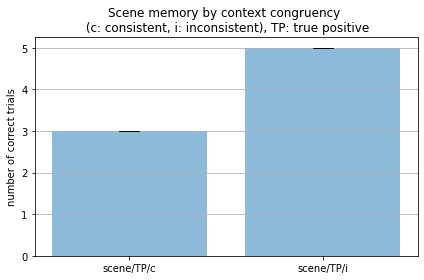

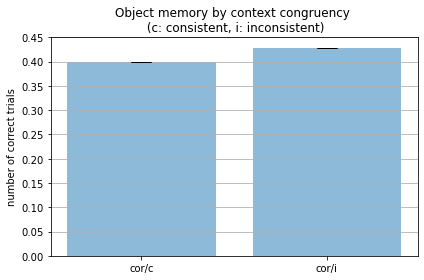

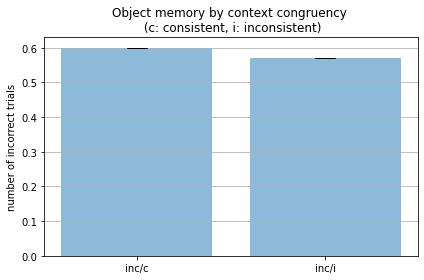

In [10]:

print("\n######################### plots of significant tests \n")
#1. ***Scene/TP/c vs. i: -3.820438 0.001874
xvars = ['scene/TP/c', 'scene/TP/i']
x_pos = np.arange(len(xvars))
CTEs = [np.mean(all_stim_TP_c), np.mean(all_stim_TP_i)]
error = [np.std(all_stim_TP_c), np.std(all_stim_TP_i)]
#print(CTEs, error)
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('number of correct trials')
ax.set_xticks(x_pos)
ax.set_xticklabels(xvars)
ax.set_title('Scene memory by context congruency \n (c: consistent, i: inconsistent), TP: true positive')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('all_stim_TP_c_vs_i.png')
plt.show()
print("\n")



########################
xvars = ['cor/c', 'cor/i']
x_pos = np.arange(len(xvars))
CTEs = [np.mean(all_cor_c_p), np.mean(all_cor_i_p)]
error = [np.std(all_cor_c_p), np.std(all_cor_i_p)]
#print(CTEs, error)
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('number of correct trials')
ax.set_xticks(x_pos)
ax.set_xticklabels(xvars)
ax.set_title('Object memory by context congruency \n (c: consistent, i: inconsistent)')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('all_cor_c_vs_i.png')
plt.show()
print("\n")

xvars = ['inc/c', 'inc/i']
x_pos = np.arange(len(xvars))
CTEs = [np.mean(all_inc_c_p), np.mean(all_inc_i_p)]
error = [np.std(all_inc_c_p), np.std(all_inc_i_p)]
#print(CTEs, error)
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('number of incorrect trials')
ax.set_xticks(x_pos)
ax.set_xticklabels(xvars)
ax.set_title('Object memory by context congruency \n (c: consistent, i: inconsistent)')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('all_inc_c_vs_i.png')
plt.show()
print("\n")

In [8]:
# print("\n######################### t-tests \n")

# [t, p] = stats.ttest_ind(all_stim_cor_a, all_stim_cor_b)
# [t2, p2] = stats.ttest_ind(all_stim_inc_a, all_stim_inc_b)
# print("Scene/correct/a vs. b: %f %f" %(t, p))
# print("Scene/incorrect/a vs. b: %f %f" %(t2, p2))
# print("\n")

# [t, p] = stats.ttest_ind(all_stim_TP_a, all_stim_TP_b)
# [t2, p2] = stats.ttest_ind(all_stim_FN_a, all_stim_FN_b)
# [t3, p3] = stats.ttest_ind(all_stim_FP_a, all_stim_FP_b)
# [t4, p4] = stats.ttest_ind(all_stim_TN_a, all_stim_TN_b)
# print("Scene/TP/a vs. b: %f %f" %(t, p))
# print("Scene/FN/a vs. b: %f %f" %(t2, p2))
# print("Scene/FP/a vs. b: %f %f" %(t3, p3))
# print("Scene/TN/a vs. b: %f %f" %(t4, p4))
# print("\n")

# [t, p] = stats.ttest_ind(all_stim_cor_c, all_stim_cor_i)
# [t2, p2] = stats.ttest_ind(all_stim_inc_i, all_stim_inc_i)
# print("Scene/correct/consistent vs. inconsistent: %f %f" %(t, p))
# print("Scene/incorrect/consistent vs. inconsistent: %f %f" %(t2, p2))
# print("\n")

# [t, p] = stats.ttest_ind(all_stim_cor_a, all_stim_cor_b)
# [t2, p2] = stats.ttest_ind(all_stim_inc_a, all_stim_inc_b)
# print("Scene/correct/a vs. b: %f %f" %(t, p))
# print("Scene/incorrect/a vs. b: %f %f" %(t2, p2))
# print("\n")

# [t, p] = stats.ttest_ind(all_stim_cor_i_a, all_stim_cor_i_b)
# [t2, p2] = stats.ttest_ind(all_stim_inc_i_a, all_stim_inc_i_b)
# print("Scene/correct/inconsistent/a vs. b: %f %f" %(t, p))
# print("Scene/incorrect/inconsistent/a vs. b: %f %f" %(t2, p2))
# print("\n")

# # object 
# print("Scene/correct/consistent: ", all_cor_c)
# print("Scene/correct/inconsistent: ", all_cor_i)
# [t, p] = stats.ttest_ind(all_cor_c, all_cor_i)
# [t2, p2] = stats.ttest_ind(all_inc_c, all_inc_i)
# print("Object/correct/consistent vs. inconsistent: %f %f" %(t, p))
# print("Object/incorrect/consistent vs. inconsistent: %f %f" %(t2, p2))

# [t, p] = stats.ttest_ind(all_cor_a, all_cor_b)
# [t2, p2] = stats.ttest_ind(all_inc_a, all_inc_b)
# print("Object/correct/a vs. b: %f %f" %(t, p))
# print("Object/incorrect/a vs. b: %f %f" %(t2, p2))
# print("\n")

# [t, p] = stats.ttest_ind(all_cor_c_a, all_cor_c_b)
# [t2, p2] = stats.ttest_ind(all_cor_i_a, all_cor_i_b)
# [t3, p3] = stats.ttest_ind(all_inc_c_a, all_inc_c_b)
# [t4, p4] = stats.ttest_ind(all_inc_i_a, all_inc_i_b)
# print("Object/cor/c/a vs. b: %f %f" %(t, p))
# print("Object/cor/i/a vs. b: %f %f" %(t2, p2))
# print("Object/inc/c/a vs. b: %f %f" %(t3, p3))
# print("Object/inc/i/a vs. b: %f %f" %(t4, p4))
# print("\n")

# print("\n######################### plots of significant tests \n")
# #1. all_stim_cor_c vs. i
# xvars = ['scene/correct/c', 'scene/correct/i']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_stim_cor_c), np.mean(all_stim_cor_i)]
# error = [np.std(all_stim_cor_c), np.std(all_stim_cor_i)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of correct trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Scene memory by context congruency \n (c: consistent, i: inconsistent)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_stim_cor_c_vs_i.png')
# plt.show()
# print("\n")

# #2. all_stim_inc_c vs. i
# xvars = ['scene/incorrect/c', 'scene/incorrect/i']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_stim_inc_c), np.mean(all_stim_inc_i)]
# error = [np.std(all_stim_inc_c), np.std(all_stim_inc_i)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of incorrect trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Scene memory by context congruency \n (c: consistent, i: inconsistent)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_stim_inc_c_vs_i.png')
# plt.show()
# print("\n")

# #3. all_stim_cor_a vs. cor_b
# xvars = ['scene/correct/a', 'scene/correct/b']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_stim_cor_a), np.mean(all_stim_cor_b)]
# error = [np.std(all_stim_cor_a), np.std(all_stim_cor_b)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of correct trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Sene memory by audio condition \n (a: control, b: both scene and object sounds)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_stim_cor_a_vs_b.png')
# plt.show()
# print("\n")

# #4. all_stim_inc_a vs. b
# xvars = ['scene/incorrect/a', 'scene/incorrect/b']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_stim_inc_a), np.mean(all_stim_inc_b)]
# error = [np.std(all_stim_inc_a), np.std(all_stim_inc_b)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of incorrect trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Scene memory by audio condition \n (a: control, b: both scene and object sounds)')
# ax.yaxis.grid(True)


# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_stim_inc_a_vs_b.png')
# plt.show()

# ## object
# #1. all_cor_c vs. i
# xvars = ['object/correct/c', 'object/correct/i']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_cor_c), np.mean(all_cor_i)]
# error = [np.std(all_cor_c), np.std(all_cor_i)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of correct trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Object memory by context congruency \n (c: consistent, i: inconsistent)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_cor_c_vs_i.png')
# plt.show()
# print("\n")

# #2. all_inc_c vs. i
# xvars = ['object/incorrect/c', 'object/incorrect/i']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_inc_c), np.mean(all_inc_i)]
# error = [np.std(all_inc_c), np.std(all_inc_i)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of incorrect trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Object memory by context congruency \n (c: consistent, i: inconsistent)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_inc_c_vs_i.png')
# plt.show()
# print("\n")


# #3. all_cor_a vs. b
# xvars = ['object/correct/a', 'object/correct/b']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_cor_a), np.mean(all_cor_b)]
# error = [np.std(all_cor_a), np.std(all_cor_b)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of correct trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Object memory by audio condition \n (a: control, b: both scene and object sounds)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_cor_a_vs_b.png')
# plt.show()
# print("\n")

# #4. all_cor_c_a vs. b
# xvars = ['object/correct/inconsistent/a', 'object/correct/inconsistent/b']
# x_pos = np.arange(len(xvars))
# CTEs = [np.mean(all_cor_i_a), np.mean(all_cor_i_b)]
# error = [np.std(all_cor_i_a), np.std(all_cor_i_b)]
# #print(CTEs, error)
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('number of correct trials')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(xvars)
# ax.set_title('Object memory by context consistency X audio condition \n (a: control, b: both scene and object sounds)')
# ax.yaxis.grid(True)

# # Save the figure and show
# plt.tight_layout()
# plt.savefig('all_cor_i_a_vs_b.png')
# plt.show()
# print("\n")